In [5]:
%run helpers/autoct_plotting.py

import autoct
from os.path import join

autoct.setup_logging('INFO')

In [6]:
output = '/data/illustration_workflow_output'
mni_file = 'illustration_data/MNI152_T1_1mm_brain.nii.gz'
atlas_file = 'illustration_data/New_atlas_cort_asym_sub.nii.gz'
template_file = 'illustration_data/T_template0.nii.gz'

In [7]:
autoct.convert(pattern='illustration_data/dcmfiles/*',
            out_dir=output,
            use_dcm2niix=True)

2021-09-16 19:17:31,140 :: autoct.convert :: INFO :: Arguments: illustration_data/dcmfiles/*:/data/illustration_workflow_output
2021-09-16 19:17:31,205 :: autoct.convert :: INFO :: Processing folder illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1


Chris Rorden's dcm2niiX version v1.0.20200331  (JP2:OpenJPEG) (JP-LS:CharLS) GCC5.5.0 (64-bit Linux)
Found 35 DICOM file(s)
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-9203.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-8253.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-9353.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-9703.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-8603.dcm'
DICOM appears corrupt: first group:element should be 0x0002:0x0000 'illustration_data/dcmfiles/ID_0eba6ca7-7473dee7c1/IM-0001-8153.dcm'
DICOM appears corrupt: first group:element should be 0x0002:

Conversion required 1.175490 seconds (1.029835 for core code).


2021-09-16 19:17:33,123 :: autoct.convert :: INFO :: Saved /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz
2021-09-16 19:17:33,125 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz:shape=(512, 512, 35)


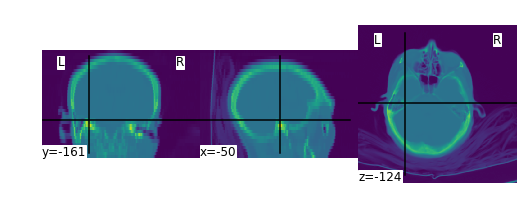

In [8]:
plot_images(join(output, '*', 'convert', '*.nii.gz'))

In [9]:
autoct.preprocessing(pattern=join(output, '*', 'convert', '*.nii.gz'),
                  out_dir=output,
                  mni_file=mni_file)

2021-09-16 19:17:38,518 :: autoct.preprocessing :: INFO :: Arguments: /data/illustration_workflow_output/*/convert/*.nii.gz:/data/illustration_workflow_output:illustration_data/MNI152_T1_1mm_brain.nii.gz
2021-09-16 19:17:38,701 :: autoct.preprocessing :: INFO :: Found 1 files
2021-09-16 19:17:38,703 :: autoct.preprocessing :: INFO :: Processing /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/convert/ID_0eba6ca7-7473dee7c1.nii.gz


2021-09-16 19:17:43,549 :: autoct.preprocessing :: INFO :: Using afni binary 3dreample ...


Final FOV is: 
0.000000 250.000000 0.000000 250.000000 4.000000 170.000000 


--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalized
 Fixed images:             illustration_data/MNI152_T1_1mm_brain.nii.gz
 Moving images:            /tmp/tmpm4ekhhxo/corrected.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        3
 Spline distance:          26
 Transform type:           a
 CC radius:                4
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsRegistration --verbose 1 --dimensionality

  preprocessing:  winsorizing the image intensities
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 1, 0]
  regular sampling (percentage = 0.25)

*** Running Euler3DTransform registration ***

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -3.389647177354e-01, 1.797693134862e+308, 4.6415e+00, 4.6412e+00, 
 2DIAGNOSTIC,     2, -3.421931424102e-01, 1.797693134862e+308, 4.6662e+00, 2.4740e-02, 
 2DIAGNOSTIC,     3, -3.465126220795e-01, 1.797693134862e+308, 4.6921e+00, 2.5870e-02, 
 2DIAGNOSTIC,     4, -3.531830159457e-01, 1.797693134862e+308, 4.7170e+00, 2.4866e-02, 
 2DIAGNOSTIC,     5, -3.600705773704e-01, 1.797693134862e+308, 4.7459e+00, 2.8923e-02, 
 2DIAGNOSTIC,     6, -3.633697240304e-01, 1.797693134862e+308, 4.7684e+00, 2.2462e-02, 
 2DIAGNOSTIC,     7,

 2DIAGNOSTIC,    91, -6.220284767954e-01, 7.482409528350e-06, 7.2632e+00, 5.9739e-02, 
 2DIAGNOSTIC,    92, -6.219344528958e-01, 7.085032553446e-06, 7.2859e+00, 2.2767e-02, 
 2DIAGNOSTIC,    93, -6.219408126736e-01, 6.822905553506e-06, 7.3101e+00, 2.4162e-02, 
 2DIAGNOSTIC,    94, -6.220007630883e-01, 6.597080895458e-06, 7.3338e+00, 2.3666e-02, 
 2DIAGNOSTIC,    95, -6.219989958993e-01, 6.144403339845e-06, 7.3619e+00, 2.8094e-02, 
 2DIAGNOSTIC,    96, -6.220112048556e-01, 5.728637321560e-06, 7.3892e+00, 2.7377e-02, 
 2DIAGNOSTIC,    97, -6.219775431863e-01, 4.376104863762e-06, 7.4182e+00, 2.8982e-02, 
 2DIAGNOSTIC,    98, -6.219881412044e-01, 2.812387111953e-06, 7.4394e+00, 2.1209e-02, 
 2DIAGNOSTIC,    99, -6.220077220381e-01, 1.196964850767e-06, 7.4670e+00, 2.7546e-02, 
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -5.336337209476e-01, 1.797693134862e+308, 1.0224e+01, 2.7566e+00, 
 2DIAGNOSTIC,     2, -5.338599847314e-01, 1.797

 2DIAGNOSTIC,    21, -4.747629573999e-01, 3.638564371413e-05, 1.3641e+02, 4.6211e+00, 
 2DIAGNOSTIC,    22, -4.747603338950e-01, 3.181533176050e-05, 1.4067e+02, 4.2636e+00, 
 2DIAGNOSTIC,    23, -4.747603747655e-01, 2.699383884010e-05, 1.4572e+02, 5.0468e+00, 
 2DIAGNOSTIC,    24, -4.747596726195e-01, 2.082882537398e-05, 1.4941e+02, 3.6909e+00, 
 2DIAGNOSTIC,    25, -4.747585789378e-01, 1.367064366976e-05, 1.5320e+02, 3.7905e+00, 
 2DIAGNOSTIC,    26, -4.747599895583e-01, 6.899584468249e-06, 1.5926e+02, 6.0591e+00, 
 2DIAGNOSTIC,    27, -4.747592244947e-01, 1.209222711990e-06, 1.6394e+02, 4.6821e+00, 
  Elapsed time (stage 0): 1.6670e+02


Stage 1
  iterations = 1000x500x250x100
  convergence threshold = 1.0000e-06
  convergence window size = 10
  number of levels = 4
  using the Mattes MI metric (number of bins = 32, weight = 1.0000e+00)
  preprocessing:  winsorizing the image intensities
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  S

 2DIAGNOSTIC,    13, -5.746798795088e-01, 2.279403666900e-04, 1.0724e+01, 1.4083e-01, 
 2DIAGNOSTIC,    14, -5.746730725161e-01, 1.302553198857e-04, 1.0854e+01, 1.2944e-01, 
 2DIAGNOSTIC,    15, -5.746539982734e-01, 7.009164094346e-05, 1.0976e+01, 1.2252e-01, 
 2DIAGNOSTIC,    16, -5.745578878323e-01, 3.374973783496e-05, 1.1129e+01, 1.5266e-01, 
 2DIAGNOSTIC,    17, -5.744677704466e-01, 1.009210918907e-05, 1.1282e+01, 1.5353e-01, 
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -5.203536652840e-01, 1.797693134862e+308, 1.3679e+01, 2.3969e+00, 
 2DIAGNOSTIC,     2, -5.205136508532e-01, 1.797693134862e+308, 1.4376e+01, 6.9647e-01, 
 2DIAGNOSTIC,     3, -5.207167614969e-01, 1.797693134862e+308, 1.5060e+01, 6.8458e-01, 
 2DIAGNOSTIC,     4, -5.209867424517e-01, 1.797693134862e+308, 1.5721e+01, 6.6058e-01, 
 2DIAGNOSTIC,     5, -5.211382442090e-01, 1.797693134862e+308, 1.6632e+01, 9.1167e-01, 
 2DIAGNOSTIC,     6, -5.213148667805e-01, 1

2021-09-16 19:26:04,172 :: autoct.preprocessing :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1
2021-09-16 19:26:04,192 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedInverseWarped.nii.gz:shape=(250, 250, 170)


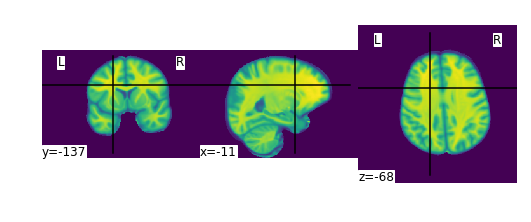

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedWarped.nii.gz:shape=(182, 218, 182)


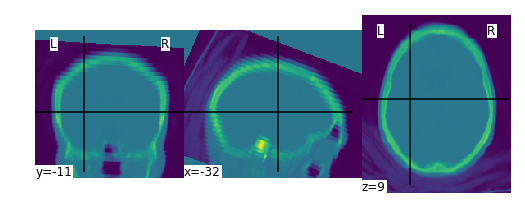

In [10]:
plot_images(join(output, '*', 'preprocessing', '*.nii.gz'))

In [11]:
autoct.skull_strip(pattern=join(output, '*', 'preprocessing', '*.nii.gz'),
                out_dir=output)

2021-09-16 19:26:11,359 :: autoct.skull_strip :: INFO :: Arguments: /data/illustration_workflow_output/*/preprocessing/*.nii.gz:/data/illustration_workflow_output
2021-09-16 19:26:11,376 :: autoct.skull_strip :: INFO :: Found 1 files
2021-09-16 19:26:11,378 :: autoct.skull_strip :: INFO :: Processing file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/preprocessing/ID_0eba6ca7-7473dee7c1_normalizedWarped.nii.gz


min 0 thresh2 0 thresh 3.35885 thresh98 33.5885 max 83.5534
c-of-g 89.3991 104.757 73.2354 mm
radius 68.3641 mm
median within-brain intensity 26.4156
self-intersection total 338.171 (threshold=4000.0) 


2021-09-16 19:26:27,987 :: autoct.skull_strip :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
2021-09-16 19:26:27,989 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz:shape=(182, 218, 182)


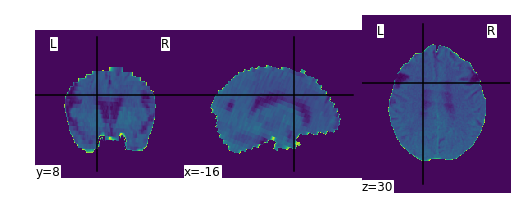

In [12]:
plot_images(join(output, '*', 'skull_strip', '*.nii.gz'))

In [13]:
autoct.registration(pattern=join(output, '*', 'skull_strip', '*.nii.gz'),
                 out_dir=output,
                 template=template_file,
                 transforms=autoct.supported_registration_transforms())

2021-09-16 19:26:29,924 :: autoct.registration :: INFO :: Arguments: /data/illustration_workflow_output/*/skull_strip/*.nii.gz:/data/illustration_workflow_output:illustration_data/T_template0.nii.gz:('s', 'a', 'so')
2021-09-16 19:26:29,943 :: autoct.registration :: INFO :: Found 1 files
2021-09-16 19:26:29,948 :: autoct.registration :: INFO :: Processing a:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz



--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affine
 Fixed images:             illustration_data/T_template0.nii.gz
 Moving images:            /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        4
 Spline distance:          26
 Transform type:           a
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsRegistration --verbose 1 --dimensional

  preprocessing:  winsorizing the image intensities
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 1, 0]
  regular sampling (percentage = 0.25)

*** Running Euler3DTransform registration ***

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -6.069701302404e-01, 1.797693134862e+308, 3.1859e+00, 3.1859e+00, 
 2DIAGNOSTIC,     2, -6.077508639628e-01, 1.797693134862e+308, 3.2069e+00, 2.0965e-02, 
 2DIAGNOSTIC,     3, -6.097908760294e-01, 1.797693134862e+308, 3.2300e+00, 2.3153e-02, 
 2DIAGNOSTIC,     4, -6.118020036428e-01, 1.797693134862e+308, 3.2549e+00, 2.4867e-02, 
 2DIAGNOSTIC,     5, -6.147903657796e-01, 1.797693134862e+308, 3.2900e+00, 3.5118e-02, 
 2DIAGNOSTIC,     6, -6.158238707910e-01, 1.797693134862e+308, 3.3119e+00, 2.1891e-02, 
 2DIAGNOSTIC,     7,

 2DIAGNOSTIC,    15, -4.666980426182e-01, 3.580285570723e-05, 2.0423e+01, 6.8818e-01, 
 2DIAGNOSTIC,    16, -4.667010769155e-01, 3.085888641423e-05, 2.0969e+01, 5.4577e-01, 
 2DIAGNOSTIC,    17, -4.667104314773e-01, 2.443997781239e-05, 2.1614e+01, 6.4474e-01, 
 2DIAGNOSTIC,    18, -4.667267810752e-01, 1.764136521756e-05, 2.2248e+01, 6.3440e-01, 
 2DIAGNOSTIC,    19, -4.667289105490e-01, 1.192640241281e-05, 2.2953e+01, 7.0460e-01, 
 2DIAGNOSTIC,    20, -4.667327662368e-01, 7.596409345230e-06, 2.3613e+01, 6.6044e-01, 
 2DIAGNOSTIC,    21, -4.667400893878e-01, 5.358106008414e-06, 2.4253e+01, 6.3968e-01, 
 2DIAGNOSTIC,    22, -4.667561486569e-01, 5.112805321193e-06, 2.4923e+01, 6.7040e-01, 
 2DIAGNOSTIC,    23, -4.667670026400e-01, 5.519156987689e-06, 2.5896e+01, 9.7248e-01, 
 2DIAGNOSTIC,    24, -4.667649706548e-01, 5.475097773114e-06, 2.6473e+01, 5.7686e-01, 
 2DIAGNOSTIC,    25, -4.667593916364e-01, 4.882128910755e-06, 2.7027e+01, 5.5402e-01, 
 2DIAGNOSTIC,    26, -4.667593391335e-01, 4

 2DIAGNOSTIC,    23, -5.505241731577e-01, 8.310561621455e-06, 9.8758e+00, 1.1790e-01, 
 2DIAGNOSTIC,    24, -5.505472874315e-01, 4.565048335334e-06, 1.0037e+01, 1.6122e-01, 
 2DIAGNOSTIC,    25, -5.505255809467e-01, 1.665208645842e-06, 1.0185e+01, 1.4827e-01, 
 2DIAGNOSTIC,    26, -5.505152710531e-01, 1.480029263805e-06, 1.0305e+01, 1.1969e-01, 
 2DIAGNOSTIC,    27, -5.505062157259e-01, 1.319224255059e-06, 1.0436e+01, 1.3075e-01, 
 2DIAGNOSTIC,    28, -5.505129608766e-01, 1.302307876545e-06, 1.0582e+01, 1.4589e-01, 
 2DIAGNOSTIC,    29, -5.505170599252e-01, 1.215927318832e-06, 1.0730e+01, 1.4841e-01, 
DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -4.707142154563e-01, 1.797693134862e+308, 1.2943e+01, 2.2132e+00, 
 2DIAGNOSTIC,     2, -4.712594003925e-01, 1.797693134862e+308, 1.3711e+01, 7.6814e-01, 
 2DIAGNOSTIC,     3, -4.720271090383e-01, 1.797693134862e+308, 1.4457e+01, 7.4561e-01, 
 2DIAGNOSTIC,     4, -4.729645401671e-01, 1.7

2021-09-16 19:28:06,118 :: autoct.registration :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affine
2021-09-16 19:28:06,119 :: autoct.registration :: INFO :: Processing s:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz



--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN
 Fixed images:             illustration_data/T_template0.nii.gz
 Moving images:            /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        4
 Spline distance:          26
 Transform type:           s
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsRegistration --verbose 1 --dimensionality 3 

  preprocessing:  winsorizing the image intensities
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 1, 0]
  regular sampling (percentage = 0.25)

*** Running Euler3DTransform registration ***

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -6.011295209121e-01, 1.797693134862e+308, 2.9806e+00, 2.9806e+00, 
 2DIAGNOSTIC,     2, -6.029762300102e-01, 1.797693134862e+308, 2.9999e+00, 1.9245e-02, 
 2DIAGNOSTIC,     3, -6.051583251209e-01, 1.797693134862e+308, 3.0244e+00, 2.4499e-02, 
 2DIAGNOSTIC,     4, -6.064976424427e-01, 1.797693134862e+308, 3.0491e+00, 2.4743e-02, 
 2DIAGNOSTIC,     5, -6.073279817339e-01, 1.797693134862e+308, 3.0702e+00, 2.1053e-02, 
 2DIAGNOSTIC,     6, -6.086735722194e-01, 1.797693134862e+308, 3.0961e+00, 2.5956e-02, 
 2DIAGNOSTIC,     7,

  preprocessing:  winsorizing the image intensities
  Shrink factors (level 1 out of 4): [8, 8, 8]
  Shrink factors (level 2 out of 4): [4, 4, 4]
  Shrink factors (level 3 out of 4): [2, 2, 2]
  Shrink factors (level 4 out of 4): [1, 1, 1]
  smoothing sigmas per level: [3, 2, 1, 0]
  regular sampling (percentage = 2.5000e-01)

*** Running AffineTransform registration ***

DIAGNOSTIC,Iteration,metricValue,convergenceValue,ITERATION_TIME_INDEX,SINCE_LAST
 2DIAGNOSTIC,     1, -6.590820858400e-01, 1.797693134862e+308, 3.0911e+00, 3.0911e+00, 
 2DIAGNOSTIC,     2, -6.598739120511e-01, 1.797693134862e+308, 3.1397e+00, 4.8592e-02, 
 2DIAGNOSTIC,     3, -6.606697170390e-01, 1.797693134862e+308, 3.1640e+00, 2.4286e-02, 
 2DIAGNOSTIC,     4, -6.619173568084e-01, 1.797693134862e+308, 3.1938e+00, 2.9882e-02, 
 2DIAGNOSTIC,     5, -6.625361242923e-01, 1.797693134862e+308, 3.2221e+00, 2.8241e-02, 
 2DIAGNOSTIC,     6, -6.628446515331e-01, 1.797693134862e+308, 3.2565e+00, 3.4453e-02, 
 2DIAGNOSTIC,  

 1DIAGNOSTIC,     3, -5.637446540485e-01, 1.797693134862e+308, 7.2450e+00, 4.0539e-01, 
 1DIAGNOSTIC,     4, -5.651813255356e-01, 1.797693134862e+308, 7.6508e+00, 4.0585e-01, 
 1DIAGNOSTIC,     5, -5.663170972250e-01, 1.797693134862e+308, 8.0631e+00, 4.1225e-01, 
 1DIAGNOSTIC,     6, -5.668723108665e-01, 1.797693134862e+308, 8.4563e+00, 3.9326e-01, 
 1DIAGNOSTIC,     7, -5.670650246598e-01, 1.797693134862e+308, 8.8523e+00, 3.9593e-01, 
 1DIAGNOSTIC,     8, -5.674198743005e-01, 1.797693134862e+308, 9.2561e+00, 4.0382e-01, 
 1DIAGNOSTIC,     9, -5.673442412626e-01, 1.797693134862e+308, 9.6855e+00, 4.2941e-01, 
 1DIAGNOSTIC,    10, -5.668446504501e-01, 9.243671623987e-04, 1.0094e+01, 4.0823e-01, 
 1DIAGNOSTIC,    11, -5.664013464966e-01, 4.701887164731e-04, 1.0492e+01, 3.9835e-01, 
 1DIAGNOSTIC,    12, -5.658261757698e-01, 1.617725750101e-04, 1.0902e+01, 4.1017e-01, 
 1DIAGNOSTIC,    13, -5.648299421742e-01, -4.498616225865e-05, 1.1288e+01, 3.8557e-01, 
XXDIAGNOSTIC,Iteration,metricValue,

2021-09-16 19:32:02,872 :: autoct.registration :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN
2021-09-16 19:32:02,875 :: autoct.registration :: INFO :: Processing so:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/skull_strip/ID_0eba6ca7-7473dee7c1_brain.nii.gz



--------------------------------------------------------------------------------------
 Mapping parameters
--------------------------------------------------------------------------------------
 ANTSPATH is /opt/ants-2.3.1

 Dimensionality:           3
 Output name prefix:       /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn
 Fixed images:             illustration_data/T_template0.nii.gz
 Moving images:            /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineWarped.nii.gz
 Mask images:              
 Initial transforms:       
 Number of threads:        4
 Spline distance:          26
 Transform type:           so
 MI histogram bins:        32
 Precision:                d
 Use histogram matching    0
 antsRegistration call:
--------------------------------------------------------------------------------------
/opt/ants-2.3.1/antsR

 1DIAGNOSTIC,     3, -5.741538000475e-01, 1.797693134862e+308, 6.9380e+00, 3.7363e-01, 
 1DIAGNOSTIC,     4, -5.763755785048e-01, 1.797693134862e+308, 7.3083e+00, 3.7023e-01, 
 1DIAGNOSTIC,     5, -5.778646181258e-01, 1.797693134862e+308, 7.7228e+00, 4.1458e-01, 
 1DIAGNOSTIC,     6, -5.786509155441e-01, 1.797693134862e+308, 8.1008e+00, 3.7800e-01, 
 1DIAGNOSTIC,     7, -5.788288165350e-01, 1.797693134862e+308, 8.4768e+00, 3.7599e-01, 
 1DIAGNOSTIC,     8, -5.785167469117e-01, 1.797693134862e+308, 8.8768e+00, 4.0002e-01, 
 1DIAGNOSTIC,     9, -5.786028049657e-01, 1.797693134862e+308, 9.2505e+00, 3.7362e-01, 
 1DIAGNOSTIC,    10, -5.784288079592e-01, 1.265752609547e-03, 9.6638e+00, 4.1334e-01, 
 1DIAGNOSTIC,    11, -5.780490555146e-01, 6.233657281004e-04, 1.0076e+01, 4.1189e-01, 
 1DIAGNOSTIC,    12, -5.781066322299e-01, 2.385416862139e-04, 1.0624e+01, 5.4830e-01, 
 1DIAGNOSTIC,    13, -5.777439505219e-01, 3.981906814773e-05, 1.1074e+01, 4.5049e-01, 
 1DIAGNOSTIC,    14, -5.776631825639

2021-09-16 19:34:28,283 :: autoct.registration :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn
2021-09-16 19:34:28,286 :: autoct.utils :: INFO :: Done: processed=3


(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineWarped.nii.gz:shape=(182, 218, 182)


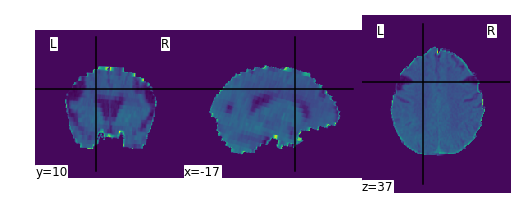

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine/ID_0eba6ca7-7473dee7c1_preprocessed_affineInverseWarped.nii.gz:shape=(182, 218, 182)


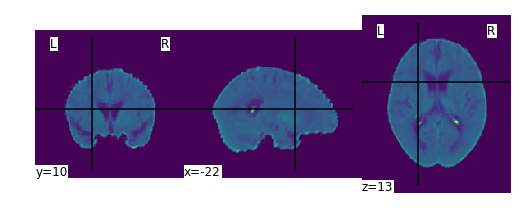

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


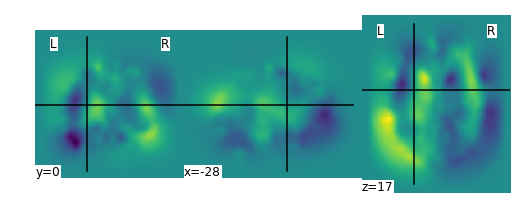

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


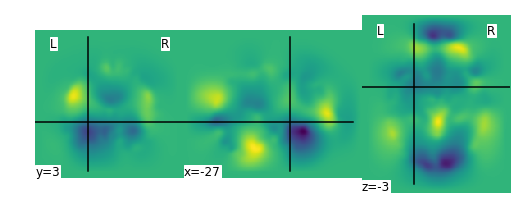

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1Warp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


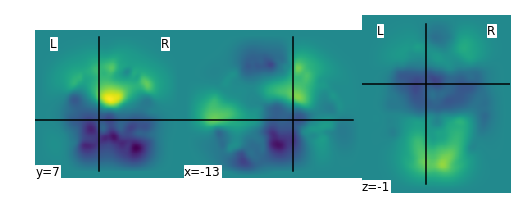

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


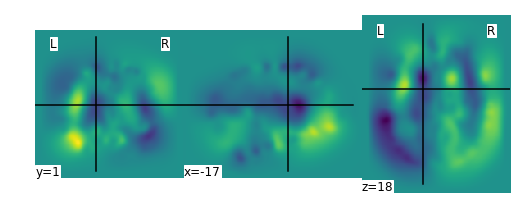

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


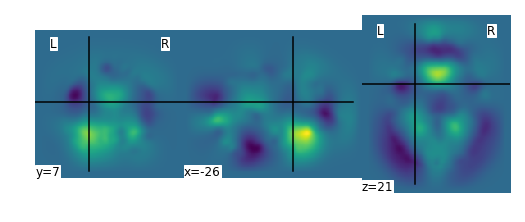

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


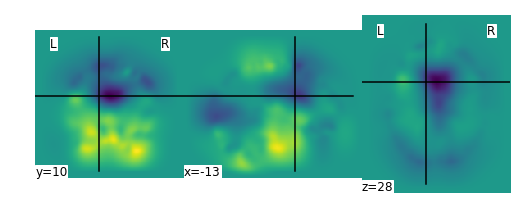

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyNInverseWarped.nii.gz:shape=(182, 218, 182)


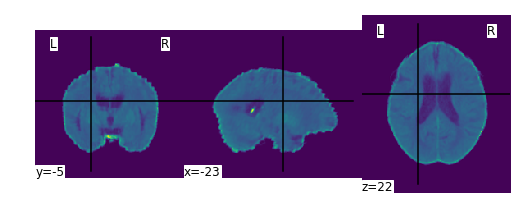

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyNWarped.nii.gz:shape=(182, 218, 182)


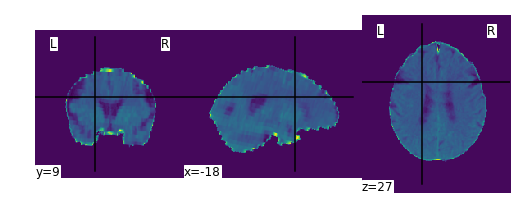

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2SynWarped.nii.gz:shape=(182, 218, 182)


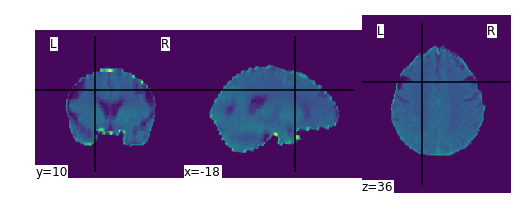

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


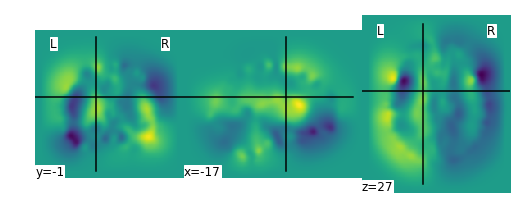

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


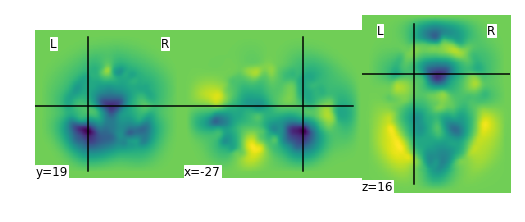

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


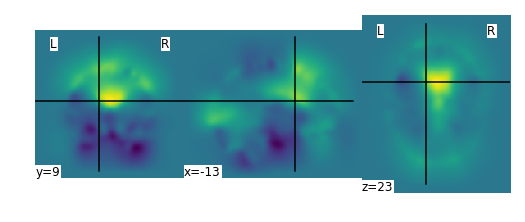

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2SynInverseWarped.nii.gz:shape=(182, 218, 182)


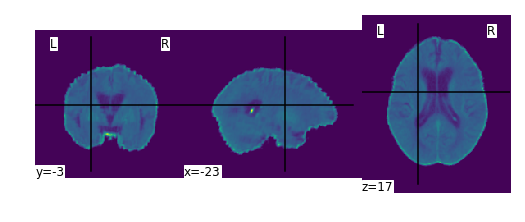

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=1:shape=(182, 218, 182, 1, 3)


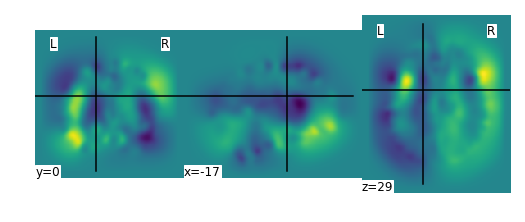

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=2:shape=(182, 218, 182, 1, 3)


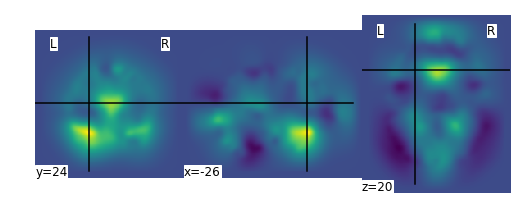

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz:volume=3:shape=(182, 218, 182, 1, 3)


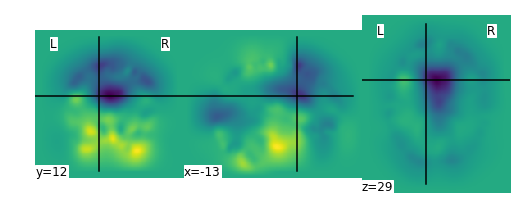

In [14]:
plot_images(join(output, '*', 'registration', '*/*.nii.gz'))

In [15]:
autoct.segmentation(pattern=join(output, '*', 'registration', '*/*.nii.gz'),
                 out_dir=output,
                 atlas=atlas_file,
                 types=autoct.supported_segmentation_types())

2021-09-16 19:35:25,363 :: autoct.segmentation :: INFO :: Arguments: /data/illustration_workflow_output/*/registration/*/*.nii.gz:/data/illustration_workflow_output:illustration_data/New_atlas_cort_asym_sub.nii.gz:('Affine', 'Physical')
2021-09-16 19:35:25,412 :: autoct.segmentation :: INFO :: Found 2 files
2021-09-16 19:35:25,413 :: autoct.segmentation :: INFO :: Processing Physical:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/SyN/ID_0eba6ca7-7473dee7c1_preprocessed_SyN1InverseWarp.nii.gz
2021-09-16 19:35:54,974 :: autoct.segmentation :: INFO :: Saved to /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/PHYSCi/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.nii.gz
2021-09-16 19:35:54,977 :: autoct.segmentation :: INFO :: Processing Affine:/data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1InverseWarp.nii.gz
2021-09-16 19:36:25,157 :: autoct.segmentation :: INFO

(0, None)

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/PHYSCi/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.nii.gz:shape=(182, 218, 182)


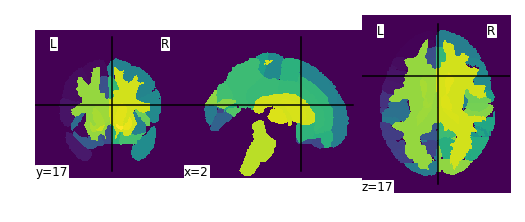

Plotting /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz:shape=(182, 218, 182)


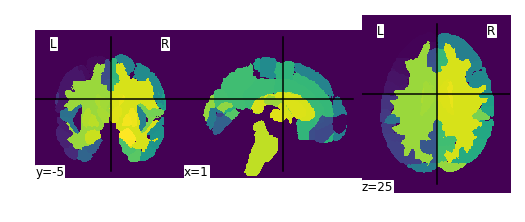

In [16]:
plot_images(join(output, '*', 'segmentation', '*/*.nii.gz'))

In [17]:
autoct.label_geometry_measures(pattern=join(output, '*', 'segmentation', '*/*.nii.gz'),
                            out_dir=output)

2021-09-16 19:36:30,875 :: autoct.label_geometry_measures :: INFO :: Arguments /data/illustration_workflow_output/*/segmentation/*/*.nii.gz:/data/illustration_workflow_output
2021-09-16 19:36:30,926 :: autoct.label_geometry_measures :: INFO :: Found 2 files
2021-09-16 19:36:30,928 :: autoct.label_geometry_measures :: INFO :: Processing file name:  /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/segmentation/AFFINE/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.nii.gz
2021-09-16 19:36:30,935 :: autoct.label_geometry_measures :: INFO :: Saving to file name: /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.txt
2021-09-16 19:36:32,599 :: autoct.label_geometry_measures :: INFO :: Saving to csv file name: /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.csv
2021-09-16 19:36:32,617 :: autoct.label_geometry_meas

(0, None)

In [18]:
plot_csv_files(pattern=join(output, '*', 'label_geometry_measures', '*.csv'))

Plotting csv file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_phy.csv


,Label,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation
0,1,54312,13311.500,0.933219,2.78313
1,2,9627,4061.910,0.974489,4.45563
2,3,22070,7691.660,0.957447,3.46491
3,4,23289,6665.740,0.920056,2.55241
4,5,5314,2232.250,0.888908,2.18300
...,...,...,...,...,...
110,111,6807,2477.780,0.951496,3.25032
111,112,2415,1069.200,0.920549,2.55999
112,113,6414,2610.950,0.979667,4.98423
113,114,3196,1272.620,0.816331,1.73135


Plotting csv file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/label_geometry_measures/ID_0eba6ca7-7473dee7c1_segmentation_cortical_affine.csv


,Label,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation
0,1,52823,13098.500,0.933402,2.78681
1,2,9239,3969.110,0.975827,4.57573
2,3,21468,7680.930,0.961026,3.61717
3,4,23328,6767.540,0.920331,2.55663
4,5,5157,2157.340,0.892051,2.21271
...,...,...,...,...,...
110,111,6526,2409.860,0.951675,3.25620
111,112,2369,1061.450,0.927376,2.67287
112,113,6489,2605.230,0.978845,4.88747
113,114,3147,1258.270,0.821883,1.75544


In [19]:
autoct.warp_intensity_stats(pattern=join(output, '*', 'registration', '*/*.nii.gz'),
                         out_dir=output,
                         atlas=atlas_file)

2021-09-16 19:36:34,665 :: autoct.warp_intensity_stats :: INFO :: Arguments /data/illustration_workflow_output/*/registration/*/*.nii.gz:/data/illustration_workflow_output:illustration_data/New_atlas_cort_asym_sub.nii.gz
2021-09-16 19:36:34,721 :: autoct.warp_intensity_stats :: INFO :: Found 1 files
2021-09-16 19:36:34,722 :: autoct.warp_intensity_stats :: INFO :: Processing /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/registration/Affine2SyN/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.nii.gz
2021-09-16 19:36:38,316 :: autoct.warp_intensity_stats :: INFO :: Saved to csv file name: /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/warp_intensity_stats/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.csv
2021-09-16 19:36:38,320 :: autoct.utils :: INFO :: Done: processed=1


(0, None)

In [20]:
plot_csv_files(pattern=join(output, '*', 'warp_intensity_stats', '*.csv'))

Plotting csv file /data/illustration_workflow_output/ID_0eba6ca7-7473dee7c1/warp_intensity_stats/ID_0eba6ca7-7473dee7c1_preprocessed_affine2Syn1Warp.csv


,Label,Mean,Sigma,Skewness,Kurtosis
0,1,-0.862238,0.750048,-1.416420,-7876.08000
1,2,-1.214670,0.836903,-1.038930,-1501.57000
2,3,-0.279447,0.412726,-0.084146,629.85700
3,4,-0.359327,0.323869,0.374472,1440.76000
4,5,-0.620927,0.213767,-0.942363,-609.57000
...,...,...,...,...,...
110,111,-1.185480,0.400339,-0.101401,-45.78490
111,112,-1.203990,0.257140,0.026321,-4.89362
112,113,-0.941489,0.344257,0.107288,86.61070
113,114,-1.715680,0.274371,-0.205729,-44.03830
